In [3]:
from torchvision import transforms
from torchvision.models import vgg19_bn
import torch.nn as nn
import numpy as np
import torch, time, warnings, keyboard, time
warnings.filterwarnings("ignore")
from PIL import Image
from mss import mss
import matplotlib.pyplot as plt
import cv2

In [4]:
turns = ['a','d']
a = False
d = False

transform = transforms.Compose([
                        transforms.ToTensor(),                    
                        transforms.Resize([256,256]),
                        transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                        ])

# resnetTurn = resnet18(pretrained=False)
# resnetTurn.fc = nn.Linear(resnetTurn.fc.in_features, len(turns))
# resnetTurn.load_state_dict(torch.load('data\set2\SpeedyNet18.pth', map_location=torch.device('cpu')))
# resnetTurn.eval()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


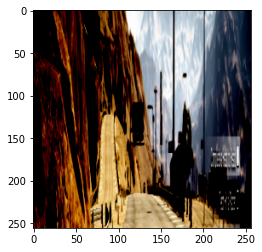

In [24]:
time.sleep(3)
ms = mss()
sc = ms.grab({'left': 0, 'top': 300, 'width': 1920, 'height': 300})
img = transform(Image.frombytes("RGB", sc.size, sc.bgra, 'raw', 'BGRX'))
img = img.swapaxes(0,1)
img = img.swapaxes(1,2)
plt.imshow(img);

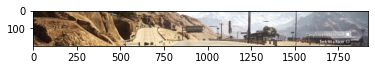

In [25]:
plt.imshow(Image.frombytes("RGB", sc.size, sc.bgra, 'raw', 'BGRX'));

## MobileNetV2

In [4]:
modelturn = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=False, verbose=False)
modelturn.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=False),
    nn.Linear(in_features=1280, out_features = 3)
)
modelturn.load_state_dict(torch.load('data\set2\MobileNetV2turnsCroppedimgsNoNorm.pth', map_location=torch.device('cpu')))
modelturn.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

## AlexNet

In [54]:
class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 3, dropout: float = 0.5) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

modelturn = AlexNet()
print(modelturn.load_state_dict(torch.load('data\set2\AlexNetTurnCroppedimgs.pth', map_location=torch.device('cpu'))))
modelturn.eval()

<All keys matched successfully>


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## VGG19 batch normalization - BAD IDEA

In [6]:
modelturn = vgg19_bn(pretrained=False)
modelturn.classifier[6] = nn.Linear(in_features=4096, out_features = 3)
print(modelturn.load_state_dict(torch.load('data\set2\VGG19_bn_crpimg.pth', map_location=torch.device('cpu'))))
modelturn.eval()

<All keys matched successfully>


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [7]:
def screen_record_efficient(top = 300, left = 0, width = 1920, height = 300):
  
    mon = {"top": top, "left": left, "width": width, "height": height}
    sct = mss()
    img = np.array(sct.grab(mon))
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
    sct.close()
    return img

def flex(np_img, turnpreds,window_name = "foo"):
    global a,d
    np_img = cv2.cvtColor(np_img, cv2.COLOR_BGR2RGB)
    if turnPreds[0]>0.5: # Left
        if d:
            keyboard.release('d')
            d = False
        keyboard.press("a")
        a = True
        np_img = cv2.arrowedLine(np_img, (960, 225), (820, 225),color = (0, 0, 255), thickness= 5, tipLength=.5) 
        
    elif turnPreds[1]>0.5: # Center
        if a:
            keyboard.release('a')
            a = False
        elif d:
            keyboard.release('d')
            d = False
        np_img = cv2.arrowedLine(np_img, (960, 225), (960, 85),color = (0, 0, 255), thickness= 5, tipLength=.5) 
        
    elif turnPreds[2]>0.5: # Right
        if a:
            keyboard.release('a')
            a = False
        keyboard.press("d")
        d = True
        np_img = cv2.arrowedLine(np_img, (960, 225), (1100, 225),color = (0, 0, 255), thickness= 5, tipLength=.5)
    
    cv2.imshow(window_name, np_img) 

In [8]:
if __name__ == "__main__":
    t = True
    
    while t:
        
        try:
            foo = screen_record_efficient()
            if cv2.waitKey(1) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break
            
            transformed_foo = transform(foo)
            transformed_foo = transformed_foo.unsqueeze(0)
            turnPreds = nn.functional.softmax(modelturn(transformed_foo)[0], dim=0)
            turnPreds = turnPreds.detach().numpy()
            flex(foo, turnpreds = turnPreds,window_name='VGG19_bn')

        except KeyboardInterrupt:

            print("Pausing the code")
            t = input("Paused")
            if t == "q":
                t == False
            else:
                continue

In [3]:
!start